Оценить влияние нового варианта интерфейса/контента/механики (группа B) на поведение пользователей по воронке: от первого взаимодействия до покупки и дохода.<br>

Гипотеза: Новый вариант (Test Group) улучшит показатели кликабельности, конверсии в покупку и общий доход по сравнению с текущим вариантом (Control Group).<br>

Metrics:<br>
CTR (Click-Through Rate) = Click / Impression<br>
CR (Conversion Rate) = Purchase / Click<br>
Earning per Impression = Earning / Impression<br>
Earning per Purchase = Earning / Purchase<br>

Project steps:

1. Extracting and transforming data<br>
2. Key metrics analysis and visualization<br>
3. Statistical analysis<br>
4. Sample power analysis<br>
5. Conclusion and results<br>

In [417]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu, shapiro, spearmanr
from statsmodels.stats.power import zt_ind_solve_power

<h3>Extracting and transforming data</h3>

In [17]:
control_group = pd.read_csv('Control Group-Tаблица 1.csv')
test_group = pd.read_csv('Test Group-Tаблица 1.csv')

In [31]:
control_group = control_group[['Impression', 'Click', 'Purchase', 'Earning']]
test_group = test_group[['Impression', 'Click', 'Purchase', 'Earning']]

In [37]:
control_group.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [39]:
test_group.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [41]:
control_group.duplicated().sum()

0

In [43]:
test_group.duplicated().sum()

0

In [47]:
len(control_group) == len(test_group)

True

In [49]:
len(control_group)

40

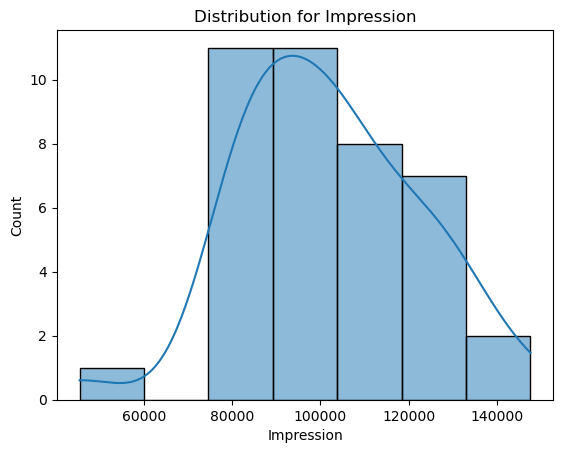

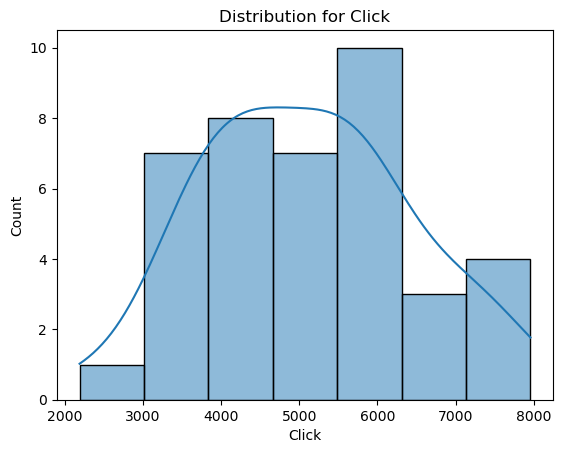

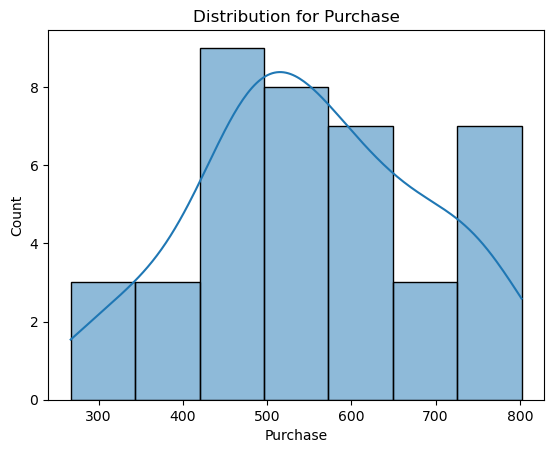

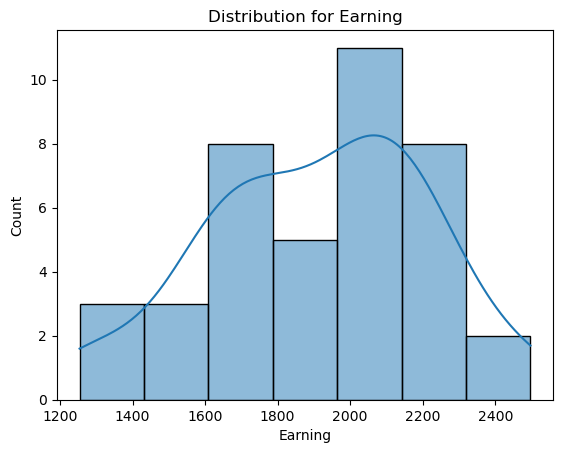

In [51]:
for column in control_group.columns:
    sns.histplot(control_group[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

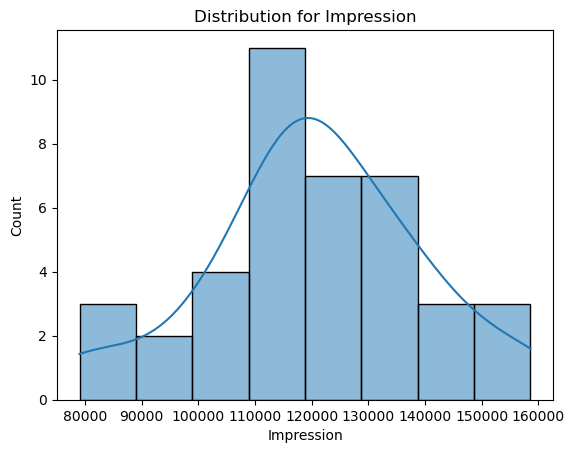

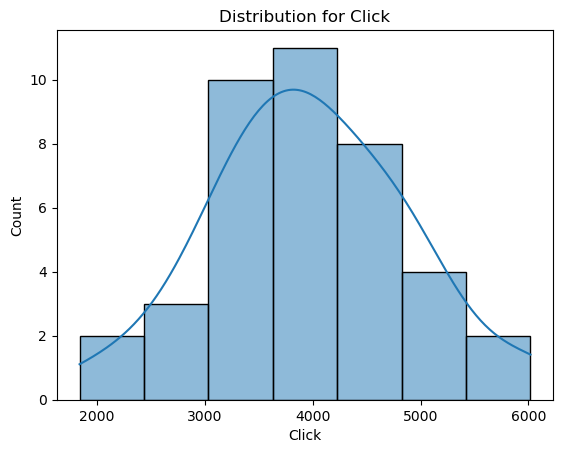

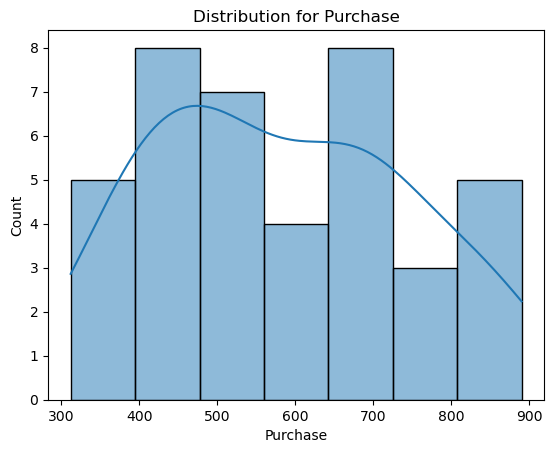

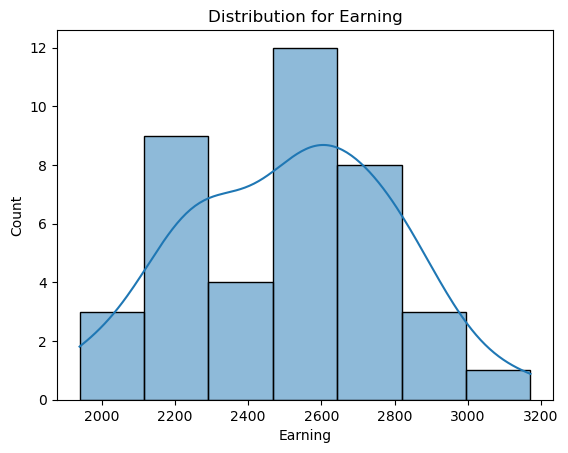

In [53]:
for column in test_group.columns:
    sns.histplot(test_group[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

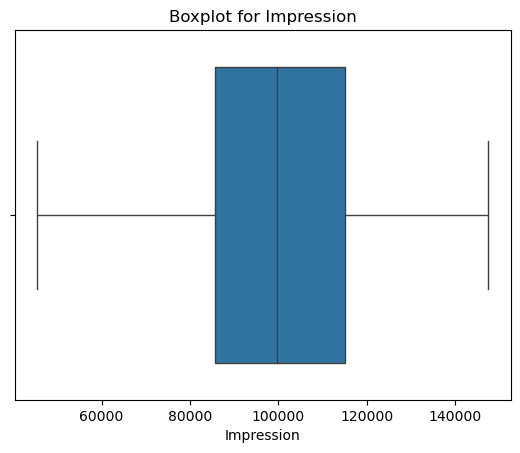

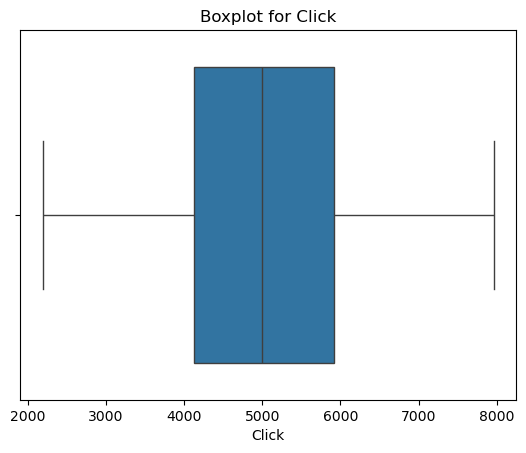

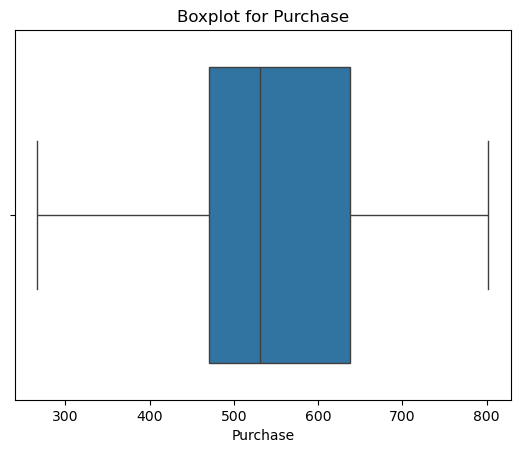

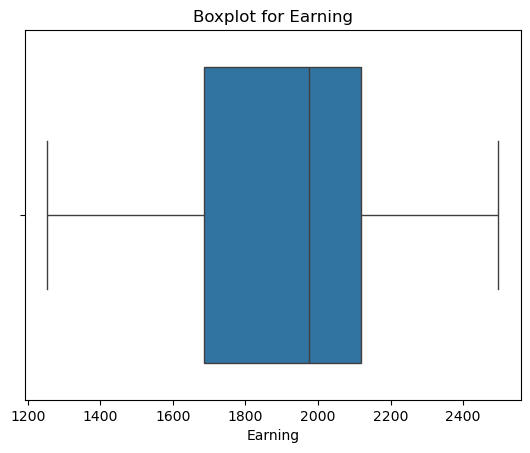

In [57]:
for column in control_group.columns:
    sns.boxplot(data=control_group, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

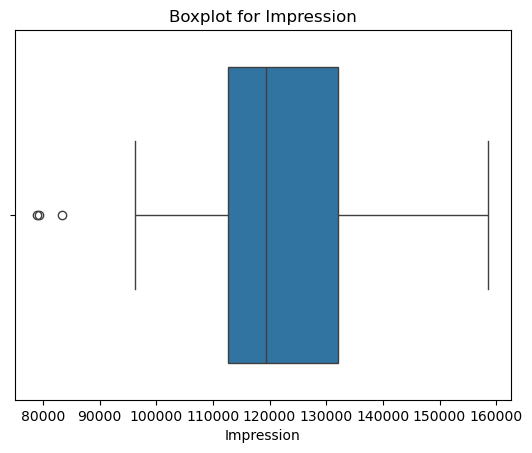

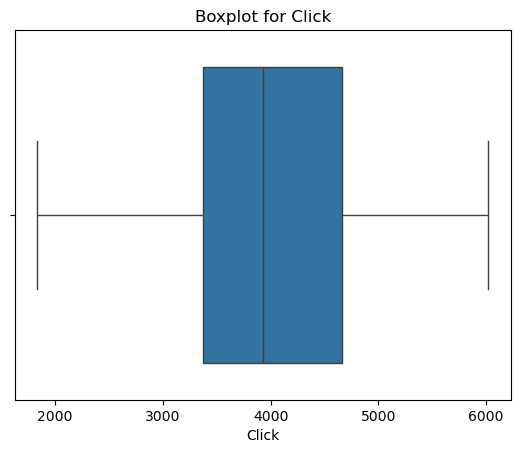

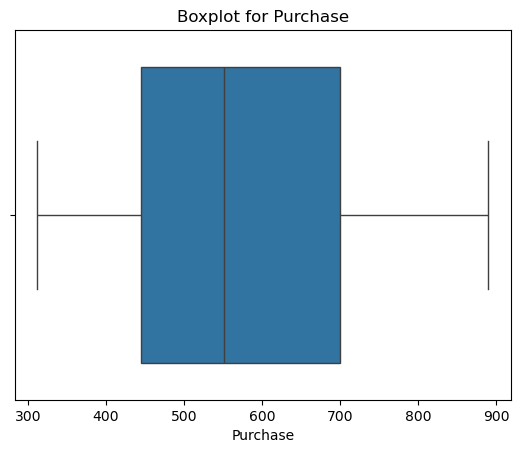

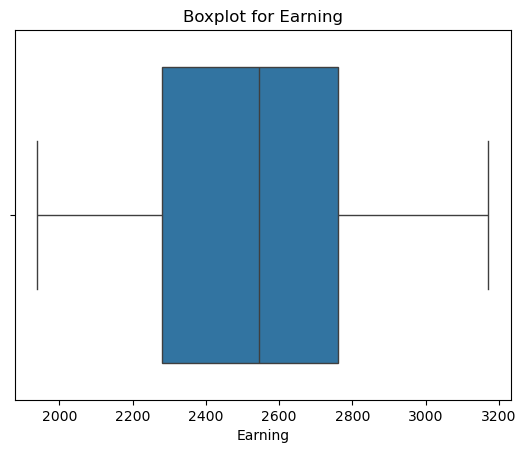

In [59]:
for column in test_group.columns:
    sns.boxplot(data=test_group, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [61]:
test_group

,Impression,Click,Purchase,Earning
0,120104,3217,702,1940
1,134776,3635,834,2929
2,107807,3057,423,2526
3,116445,4650,429,2281
4,145083,5201,750,2782
5,115923,4214,778,2157
6,106116,3279,492,2560
7,125957,4691,856,2564
8,117443,3908,660,2242
9,131272,4721,532,2368


<h4>Feature engineering</h4>

In [64]:
def add_row_metrics(df):
    df = df.copy()
    df['CTR'] = df['Click'] / df['Impression']
    df['Conversion'] = df['Purchase'] / df['Click']
    df['Earning_per_Impression'] = df['Earning'] / df['Impression']
    df['Earning_per_Purchase'] = df['Earning'] / df['Purchase']
    return df

In [68]:
control_group = add_row_metrics(control_group)
test_group = add_row_metrics(test_group)

In [73]:
control_group.describe()

,Impression,Click,Purchase,Earning,CTR,Conversion,Earning_per_Impression,Earning_per_Purchase
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,101711.450000,5100.625000,550.900000,1908.575000,0.053618,0.115924,0.019473,3.688122
std,20302.122984,1329.957772,134.110517,302.868329,0.024849,0.045399,0.004770,1.137914
min,45476.000000,2190.000000,267.000000,1254.000000,0.020760,0.040399,0.010645,1.827160
25%,85726.750000,4124.250000,470.500000,1685.750000,0.039219,0.085171,0.016561,2.974933
50%,99790.500000,5001.500000,531.500000,1975.000000,0.048795,0.109540,0.018734,3.490137
75%,115212.500000,5923.500000,638.000000,2120.000000,0.057985,0.144823,0.021904,4.082449
max,147539.000000,7959.000000,802.000000,2497.000000,0.162064,0.304110,0.030894,6.711610


In [75]:
test_group.describe()

,Impression,Click,Purchase,Earning,CTR,Conversion,Earning_per_Impression,Earning_per_Purchase
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,120512.425000,3967.550000,582.050000,2514.925000,0.034176,0.156551,0.021398,4.653562
std,18807.466616,923.071766,161.175164,282.707912,0.012256,0.068164,0.004325,1.361940
min,79034.000000,1837.000000,312.000000,1940.000000,0.014735,0.063645,0.013808,2.647541
25%,112692.250000,3376.500000,444.750000,2280.250000,0.028157,0.110265,0.018603,3.659998
50%,119291.500000,3931.500000,551.000000,2544.500000,0.031355,0.146206,0.020087,4.451880
75%,132050.750000,4660.250000,699.750000,2761.750000,0.037262,0.183013,0.023437,5.518398
max,158606.000000,6020.000000,890.000000,3171.000000,0.075749,0.448013,0.032847,8.176282


In [83]:
control_group['High Impression'] = (control_group['Impression'] > 100000).astype(int)
test_group['High Impression'] = (test_group['Impression'] > 120000).astype(int)

In [85]:
control_group['High Click'] = (control_group['Click'] > 5000).astype(int)
test_group['High Click'] = (test_group['Click'] > 4000).astype(int)

In [87]:
control_group['High Purchase'] = (control_group['Purchase'] > 530).astype(int)
test_group['High Purchase'] = (test_group['Purchase'] > 550).astype(int)

<h3>Feature Analysis</h3>

In [223]:
click_means_control = control_group.groupby('High Impression')['Click'].mean()
click_means_test = test_group.groupby('High Impression')['Click'].mean()

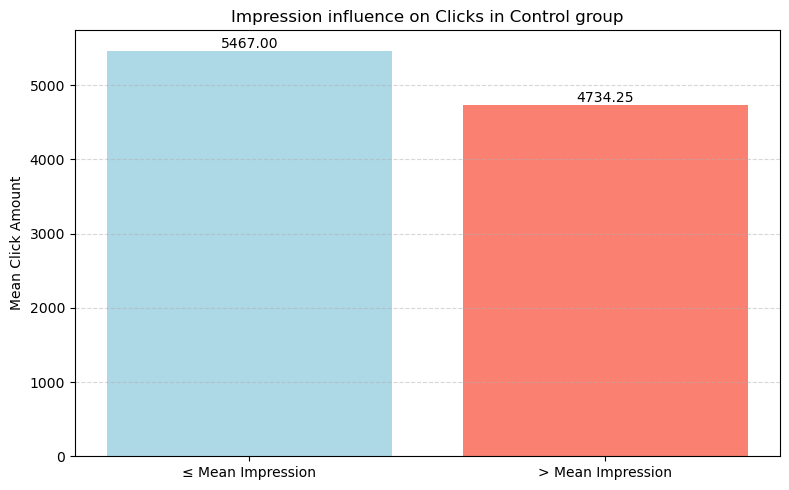

In [225]:
labels = ['≤ Mean Impression', '> Mean Impression']
values = [click_means_control[0], click_means_control[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['lightblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Click Amount')
plt.title('Impression influence on Clicks in Control group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

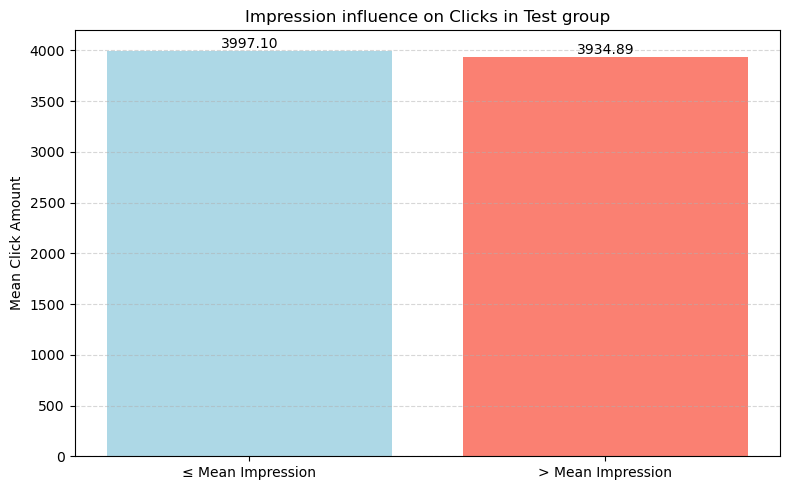

In [227]:
labels = ['≤ Mean Impression', '> Mean Impression']
values = [click_means_test[0], click_means_test[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['lightblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Click Amount')
plt.title('Impression influence on Clicks in Test group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [229]:
purchase_means_control = control_group.groupby('High Click')['Purchase'].mean()
purchase_means_test = test_group.groupby('High Click')['Purchase'].mean()

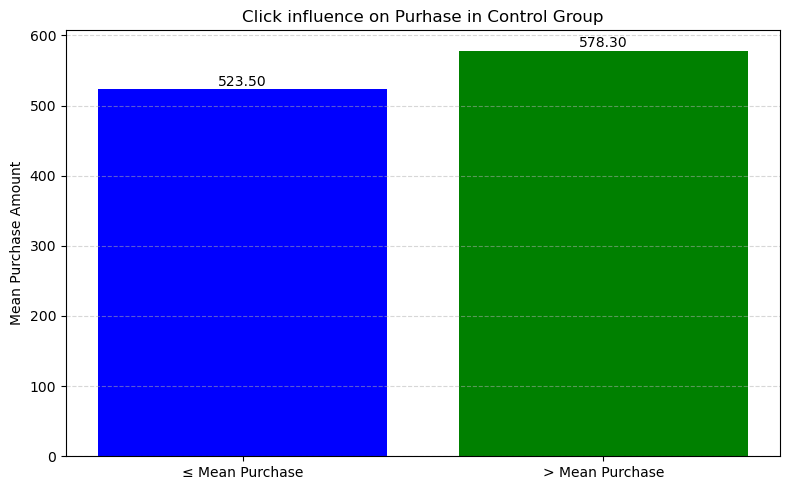

In [231]:
labels = ['≤ Mean Purchase', '> Mean Purchase']
values = [purchase_means_control[0], purchase_means_control[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['blue', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Purchase Amount')
plt.title('Click influence on Purhase in Control Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

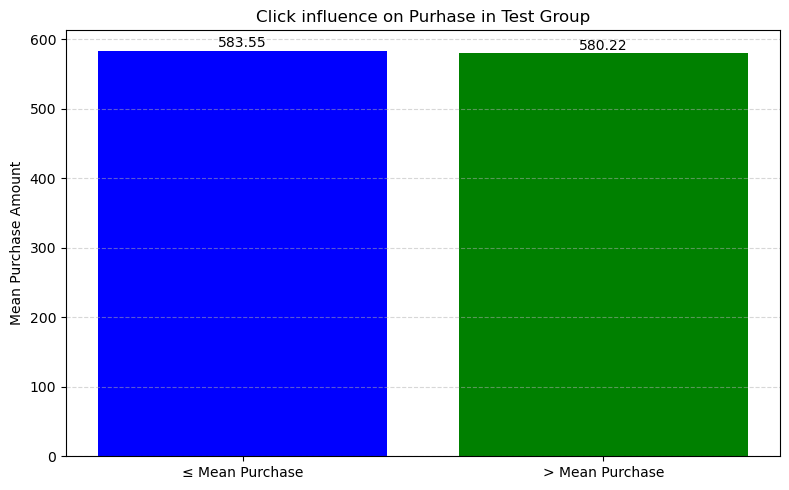

In [233]:
labels = ['≤ Mean Purchase', '> Mean Purchase']
values = [purchase_means_test[0], purchase_means_test[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['blue', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Purchase Amount')
plt.title('Click influence on Purhase in Test Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [235]:
earnings_means_control = control_group.groupby('High Purchase')['Earning'].mean()
earnings_means_test = test_group.groupby('High Purchase')['Earning'].mean()

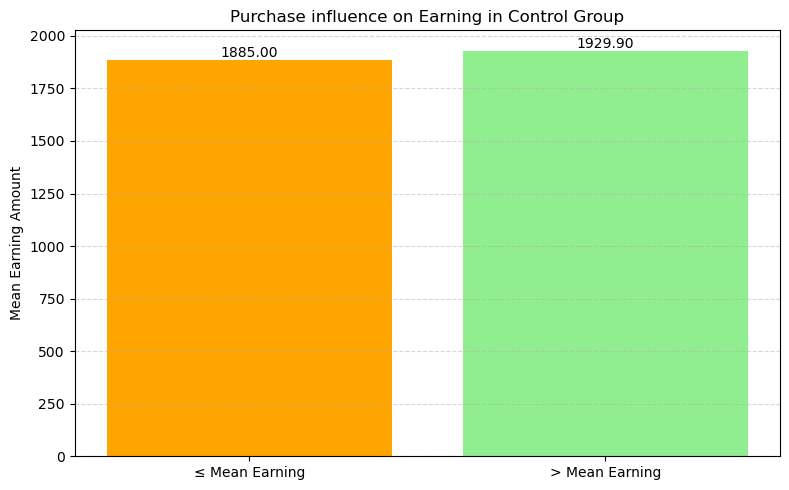

In [237]:
labels = ['≤ Mean Earning', '> Mean Earning']
values = [earnings_means_control[0], earnings_means_control[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['orange', 'lightgreen'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Earning Amount')
plt.title('Purchase influence on Earning in Control Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

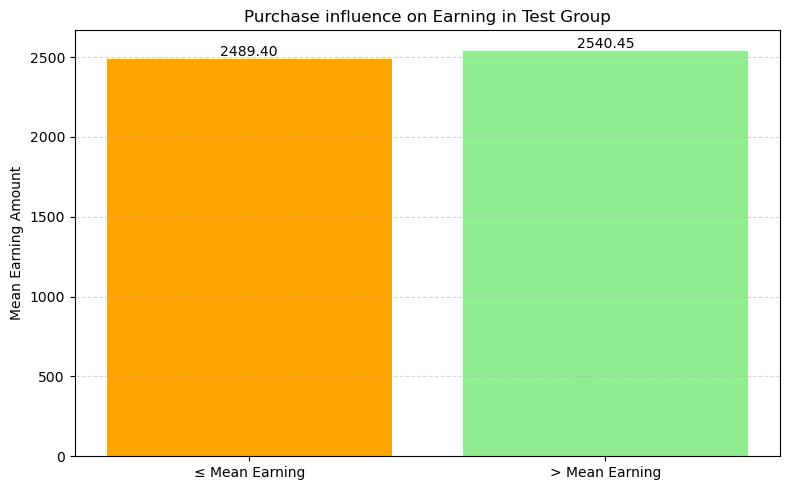

In [239]:
labels = ['≤ Mean Earning', '> Mean Earning']
values = [earnings_means_test[0], earnings_means_test[1]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['orange', 'lightgreen'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Mean Earning Amount')
plt.title('Purchase influence on Earning in Test Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In the test group, users with above-average impressions (High Impression = 1) showed slightly lower average click activity—3934.89 compared to 3997.10 for those with impressions below or equal to the average. This suggests that increasing the number of impressions does not necessarily lead to more clicks, possibly due to banner fatigue or reduced interest from repeated exposure. Additionally, users with a high number of clicks (High Click = 1) made slightly fewer purchases—580.22 versus 583.55—indicating that more clicks don’t always translate into more purchases, perhaps due to indecisive or non-targeted behavior. However, the earnings tell a different story: users with above-average purchases (High Purchase = 1) generated more revenue—2540.45 compared to 2489.40—confirming the expected relationship between purchase volume and earnings.<br>

In the control group, the pattern is somewhat different. Users with above-average impressions clicked less—4734.25 compared to 5467.00—again supporting the idea that more impressions don’t guarantee more engagement. Unlike the test group, however, users with more clicks made more purchases—578.3 versus 523.5—suggesting a more linear and predictable funnel. Earnings also increased: users with higher purchase counts brought in 1929.90, while others generated 1885.00.<br>

Overall, in both groups, more purchases are clearly associated with higher earnings, which is expected. However, the influence of impressions and clicks on downstream actions varies: in the test group, more impressions and clicks don’t always lead to more purchases, while in the control group, the relationship is stronger. This may reflect differences in interface design, content structure, or user experience between the two variants.

Посмотрим корреляцию переменных по Спирману, так как данные распределены ненормальным образом

In [243]:
columns = ['Impression', 'Click', 'Purchase', 'Earning']

In [245]:
spearman_corr_control = control_group[columns].corr(method='spearman')
spearman_corr_test = test_group[columns].corr(method='spearman')

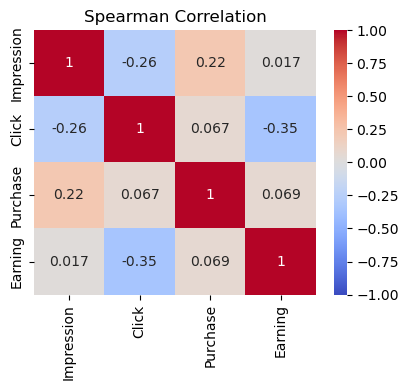

In [247]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.heatmap(spearman_corr_control, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()

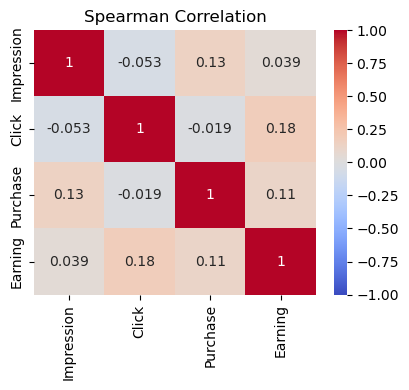

In [249]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.heatmap(spearman_corr_test, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()

In the test group, there is a moderately negative correlation between the number of impressions and clicks (Spearman coefficient –0.263), which may indicate banner fatigue—users who see more ads tend to click less. At the same time, impressions show a weak positive correlation with purchases (0.220), suggesting that repeated exposure may slightly increase the likelihood of a purchase. However, the correlation between impressions and earnings is nearly zero (0.017), meaning that increasing impressions does not directly lead to higher revenue.<br>

Clicks in the test group are weakly positively correlated with purchases (0.067), but show a noticeable negative correlation with earnings (–0.349). This could imply that clicks are not always high-quality or targeted—users may click without making purchases or generating meaningful revenue. Purchases and earnings have a weak positive relationship (0.069), possibly due to varying purchase values.<br>

In the control group, the relationships between variables are generally weaker, but the direction of correlation differs. Impressions have almost no effect on clicks (–0.053), but show a slight positive correlation with purchases (0.135) and earnings (0.039), suggesting a more balanced user response. Clicks are not correlated with purchases (–0.019), but have a weak positive correlation with earnings (0.177), indicating that clicks in this group may be more valuable. Purchases and earnings also show a weak positive correlation (0.111), which aligns with expectations.

<h4>Funnel Analysis</h4>

In [254]:
def build_funnel(df, group_name='Group'):
    funnel = {
        'Impressions': df['Impression'].sum(),
        'Clicks': df['Click'].sum(),
        'Purchases': df['Purchase'].sum(),
        'Earnings': df['Earning'].sum()
    }
    funnel_df = pd.DataFrame(funnel, index=[group_name])
    return funnel_df

funnel_a = build_funnel(control_group, 'Control Group')
funnel_b = build_funnel(test_group, 'Test Group')

funnel = pd.concat([funnel_a, funnel_b])
print(funnel)

               Impressions  Clicks  Purchases  Earnings
Control Group      4068458  204025      22036     76343
Test Group         4820497  158702      23282    100597


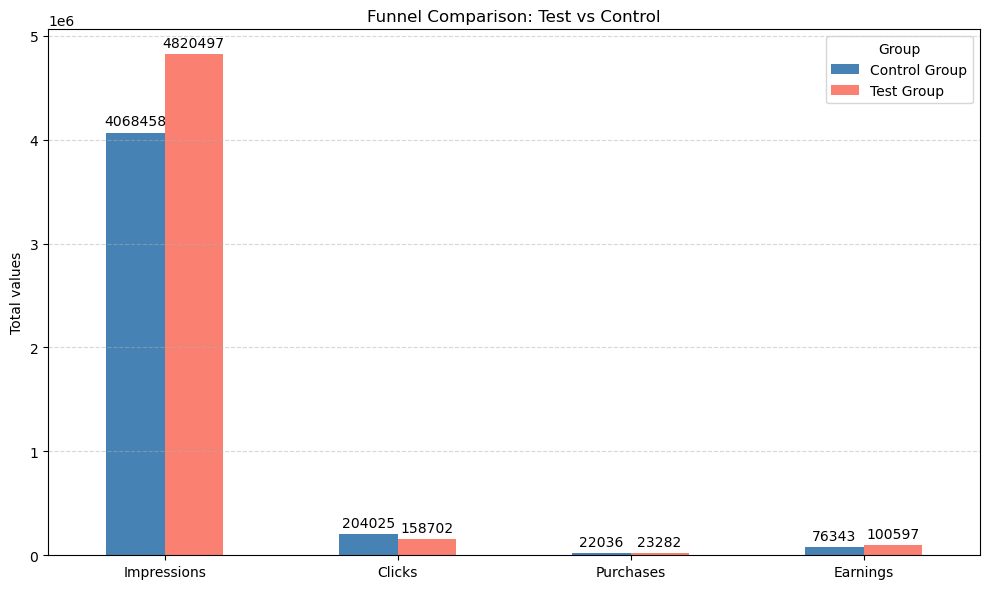

In [260]:
funnel_T = funnel.T

ax = funnel_T.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'salmon'])

plt.title('Funnel Comparison: Test vs Control')
plt.ylabel('Total values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Group')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()

The test group recorded a higher number of impressions—4,820,497 compared to 4,068,458 in the control group—which may indicate a more aggressive outreach strategy or a modified display logic. Despite this, the number of clicks in the test group was significantly lower—158,702 versus 204,025—suggesting reduced appeal of the advertising materials, banner fatigue, or a less relevant audience. However, despite fewer clicks, the test group achieved a higher number of purchases—23,282 compared to 22,036—indicating higher-quality traffic and better conversion. The most notable difference is in earnings: the test group generated 100,597 units, while the control group brought in 76,343. This means that the test version, despite having fewer clicks, proved to be more effective in terms of final outcomes. Overall, the test group demonstrates greater efficiency: fewer clicks, but more purchases and higher revenue, which may reflect more precise targeting, an improved user experience, or an optimized funnel structure.

<h3>Key metrics analysis</h3>

In [295]:
control_group_ctr = sum(control_group['CTR']) / len(control_group['CTR']) * 100
test_group_ctr = sum(test_group['CTR']) / len(test_group['CTR']) * 100

In [297]:
control_group_conversion = sum(control_group['Conversion']) / len(control_group['Conversion']) * 100
test_group_conversion = sum(test_group['Conversion']) / len(test_group['Conversion']) * 100

In [279]:
control_group_earning_per_impression = sum(control_group['Earning_per_Impression']) / len(control_group['Earning_per_Impression'])
test_group_earning_per_impression = sum(test_group['Earning_per_Impression']) / len(test_group['Earning_per_Impression'])

In [281]:
control_group_earning_per_purchase = sum(control_group['Earning_per_Purchase']) / len(control_group['Earning_per_Purchase'])
test_group_earning_per_purchase = sum(test_group['Earning_per_Purchase']) / len(test_group['Earning_per_Purchase'])

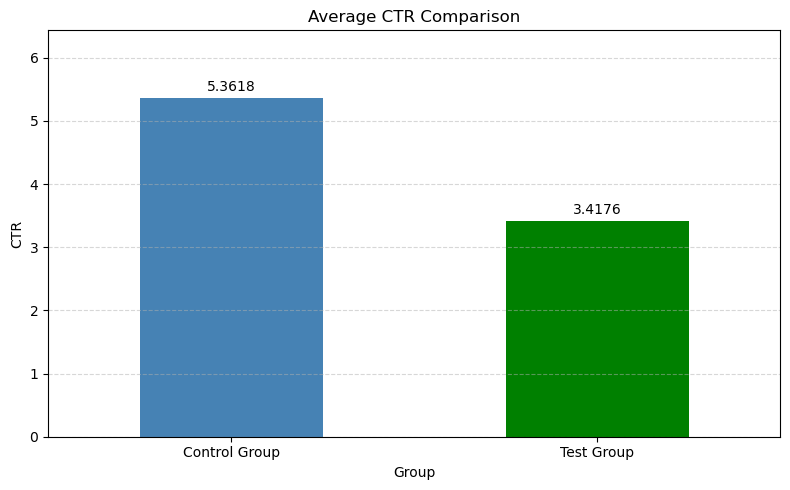

In [307]:
ctr_data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    'CTR': [control_group_ctr, test_group_ctr]
})

ax = ctr_data.plot(kind='bar', x='Group', y='CTR', legend=False, color=['steelblue', 'green'], figsize=(8, 5))

plt.title('Average CTR Comparison')
plt.ylabel('CTR')
plt.xticks(rotation=0)
plt.ylim(0, max(ctr_data['CTR']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

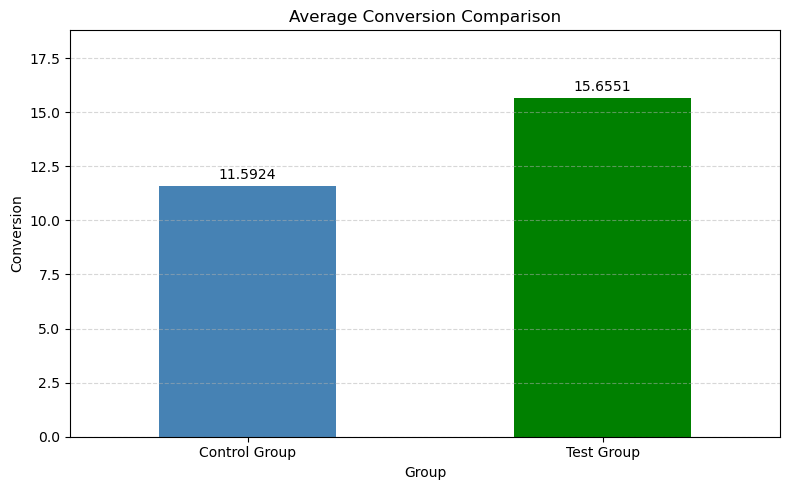

In [309]:
conversion_data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    'Conversion': [control_group_conversion, test_group_conversion]
})

ax = conversion_data.plot(kind='bar', x='Group', y='Conversion', legend=False, color=['steelblue', 'green'], figsize=(8, 5))

plt.title('Average Conversion Comparison')
plt.ylabel('Conversion')
plt.xticks(rotation=0)
plt.ylim(0, max(conversion_data['Conversion']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

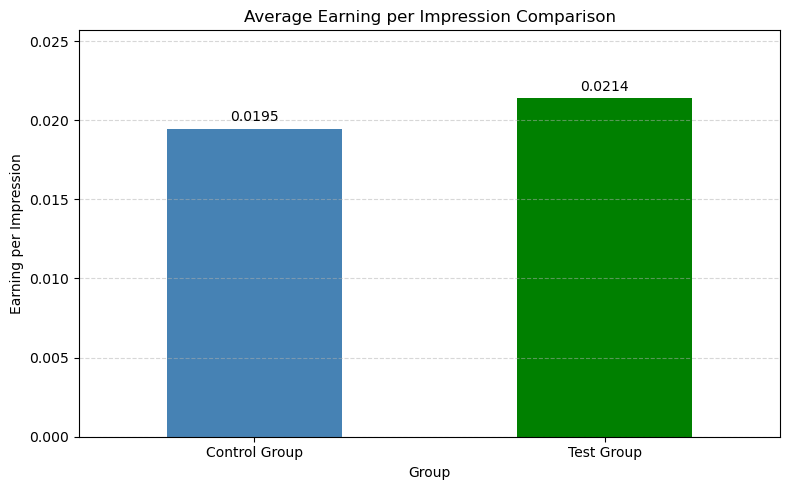

In [311]:
earning_per_impression_data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    'Earning per Impression': [control_group_earning_per_impression, test_group_earning_per_impression]
})

ax = earning_per_impression_data.plot(kind='bar', x='Group', y='Earning per Impression', legend=False, color=['steelblue', 'green'], figsize=(8, 5))

plt.title('Average Earning per Impression Comparison')
plt.ylabel('Earning per Impression')
plt.xticks(rotation=0)
plt.ylim(0, max(earning_per_impression_data['Earning per Impression']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

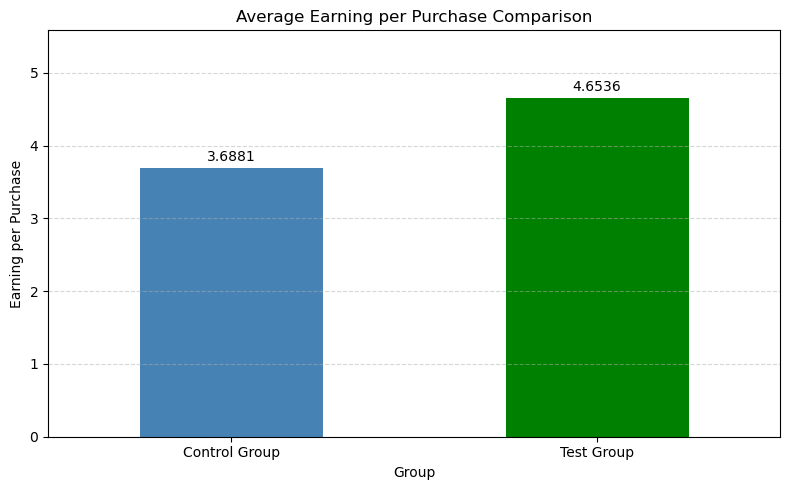

In [313]:
earning_per_purchase_data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    'Earning per Purchase': [control_group_earning_per_purchase, test_group_earning_per_purchase]
})

ax = earning_per_purchase_data.plot(kind='bar', x='Group', y='Earning per Purchase', legend=False, color=['steelblue', 'green'], figsize=(8, 5))

plt.title('Average Earning per Purchase Comparison')
plt.ylabel('Earning per Purchase')
plt.xticks(rotation=0)
plt.ylim(0, max(earning_per_purchase_data['Earning per Purchase']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

The test group shows more effective results across key metrics despite having a lower CTR. The average CTR in the control group is 5.36%, while in the test group it’s 3.42%. This means users in the control group clicked on ads more frequently. However, a higher CTR doesn’t always indicate better performance, especially if those clicks don’t lead to conversions or revenue.<br>

The conversion rate from click to purchase is significantly higher in the test group—15.66% compared to 11.59% in the control group. This suggests that clicks in the test group were more targeted, with users more likely to complete a purchase.<br>

Earnings per impression are also higher in the test group—0.0214 versus 0.0195—indicating that each ad view generated more revenue, even with fewer clicks.<br>

Earnings per purchase in the test group amount to 4.65, compared to 3.69 in the control group. This means the average value of each purchase was higher, possibly due to more expensive products or a higher-quality audience.<br>

Overall, the test group demonstrates a more efficient funnel: fewer clicks, but more purchases and higher revenue. This may reflect more precise targeting, an improved user experience, or a better-optimized advertising strategy.

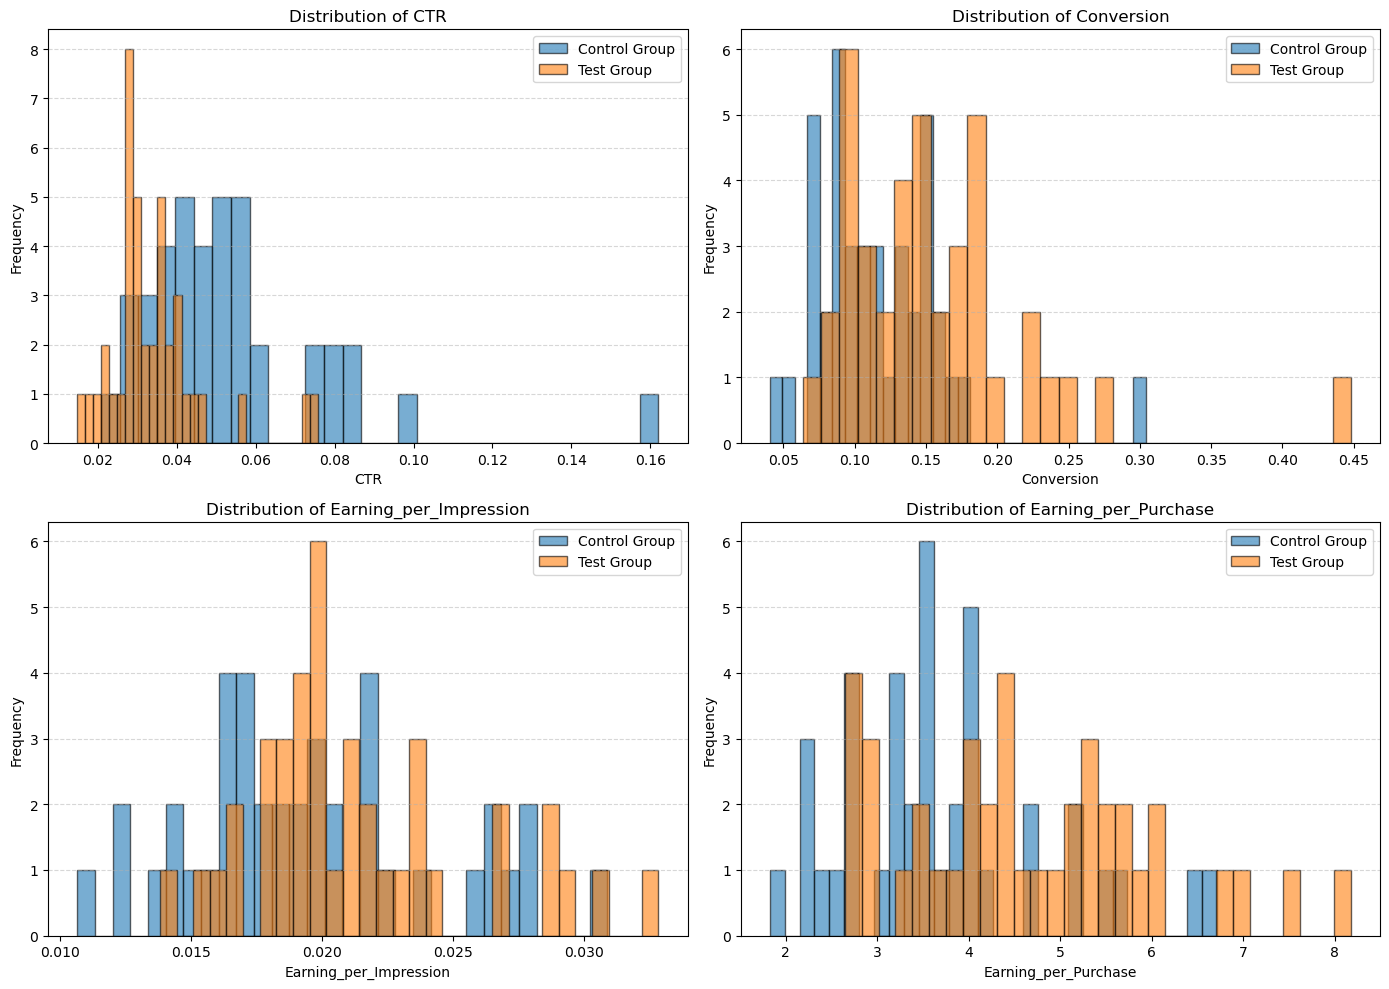

In [330]:
metrics = ['CTR', 'Conversion', 'Earning_per_Impression', 'Earning_per_Purchase']
group_names = ['Control Group', 'Test Group']
dataframes = [control_group, test_group]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    
    for df, name in zip(dataframes, group_names):
        plt.hist(df[metric], bins=30, alpha=0.6, label=name, edgecolor='black')
    
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [341]:
for metric in metrics:
    print(shapiro(control_group[metric]))

ShapiroResult(statistic=0.8071770790291827, pvalue=9.59336501182404e-06)
ShapiroResult(statistic=0.8724630474495527, pvalue=0.00033173215750829227)
ShapiroResult(statistic=0.9661694121569183, pvalue=0.2704090798060744)
ShapiroResult(statistic=0.9374455394316228, pvalue=0.028382605701107098)


In [343]:
for metric in metrics:
    print(shapiro(test_group[metric]))

ShapiroResult(statistic=0.8414848690822798, pvalue=5.626699215070649e-05)
ShapiroResult(statistic=0.8379144180231036, pvalue=4.639320631728947e-05)
ShapiroResult(statistic=0.9299294567889073, pvalue=0.016020690003934544)
ShapiroResult(statistic=0.9613124720954578, pvalue=0.18569028990273237)


<h3>Statistical importamce analysis</h3>

H0: No difference between groups<br>
H1: Significant difference between groups

In [355]:
def run_mannwhitney(control_df, test_df, metrics_list):
    results = []
    for metric in metrics_list:
        if metric in control_df.columns and metric in test_df.columns:
            stat, p = mannwhitneyu(control_df[metric], test_df[metric], alternative='two-sided')
            results.append({
                'Metric': metric,
                'U-statistic': round(stat, 4),
                'p-value': round(p, 6),
                'Significant': 'Yes' if p < 0.05 else 'No'
            })
    return pd.DataFrame(results)

results_df = run_mannwhitney(control_group, test_group, metrics)
print(results_df)

                   Metric  U-statistic   p-value Significant
0                     CTR       1308.0  0.000001         Yes
1              Conversion        459.0  0.001051         Yes
2  Earning_per_Impression        593.0  0.046917         Yes
3    Earning_per_Purchase        453.0  0.000855         Yes


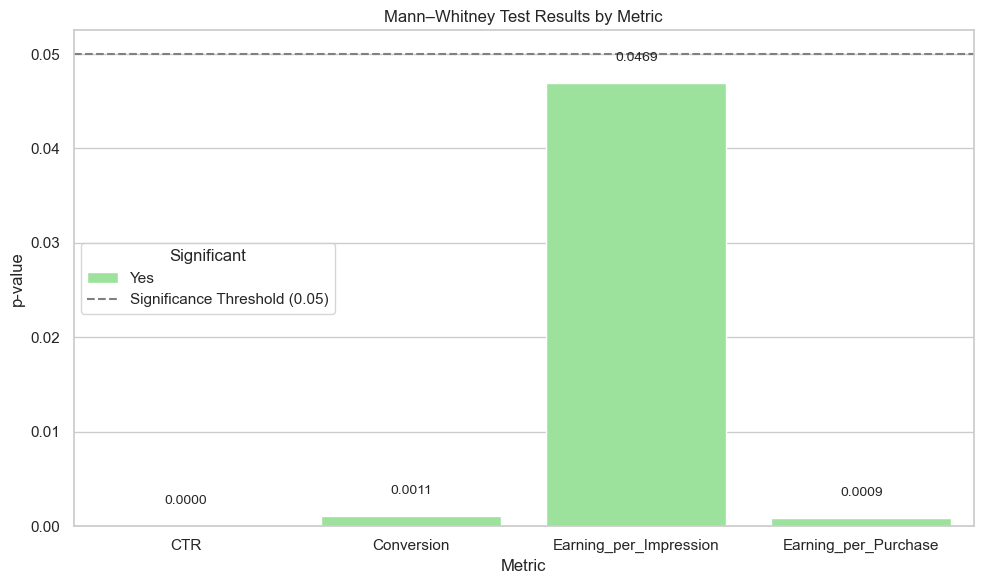

In [364]:
sns.set(style='whitegrid')

results_df['p-value'] = results_df['p-value'].astype(float)

palette = {'Yes': 'lightgreen', 'No': 'steelblue'}

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x='Metric', y='p-value', hue='Significant', palette=palette)

plt.axhline(0.05, color='gray', linestyle='--', label='Significance Threshold (0.05)')

for i, row in results_df.iterrows():
    ax.text(i, row['p-value'] + 0.002, f"{row['p-value']:.4f}", ha='center', va='bottom', fontsize=10)

plt.title('Mann–Whitney Test Results by Metric')
plt.ylabel('p-value')
plt.xlabel('Metric')
plt.legend(title='Significant')
plt.tight_layout()
plt.show()

The results of the Mann–Whitney U test show that the differences between the control and test groups across all four metrics are statistically significant. For the CTR metric, the U-statistic is 1308.0 with a p-value of 0.000001, indicating that the difference in click-through rates between the groups is highly unlikely to be due to chance. The conversion rate from click to purchase also differs significantly: a U-statistic of 459.0 and a p-value of 0.001051 confirm that users in the test group are more likely to complete a purchase after clicking. Earnings per impression show a U-statistic of 593.0 and a p-value of 0.046917, suggesting a statistically significant—though less pronounced—advantage for the test group in terms of revenue per ad view. Finally, earnings per purchase demonstrate a strong difference, with a U-statistic of 453.0 and a p-value of 0.000855, indicating that the average value of a purchase is higher in the test group. All p-values are below the 0.05 threshold, allowing us to confidently conclude that the test group delivers improved performance, and these improvements are not random. This confirms the effectiveness of the changes introduced in the test version—whether in targeting, creative assets, display logic, or user journey.

<h3>Power analysis</h3>

In [376]:
def bootstrap_power(group1, group2, n_iterations=1000, alpha=0.05):
    count_significant = 0
    for _ in range(n_iterations):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        stat, p = mannwhitneyu(sample1, sample2, alternative='two-sided')
        if p < alpha:
            count_significant += 1
    return count_significant / n_iterations

def evaluate_power_all_metrics(control_df, test_df, metrics, n_iterations=1000, alpha=0.05):
    power_results = []
    for metric in metrics:
        if metric in control_df.columns and metric in test_df.columns:
            power = bootstrap_power(control_df[metric].values, test_df[metric].values,
                                    n_iterations=n_iterations, alpha=alpha)
            power_results.append({
                'Metric': metric,
                'Estimated Power': round(power, 3),
                'Sufficient Power (≥0.8)': 'Yes' if power >= 0.8 else 'No'
            })
    return pd.DataFrame(power_results)

power_df = evaluate_power_all_metrics(control_group, test_group, metrics)
power_df

,Metric,Estimated Power,Sufficient Power (≥0.8)
0,CTR,1.000,Yes
1,Conversion,0.925,Yes
2,Earning_per_Impression,0.521,No
3,Earning_per_Purchase,0.928,Yes


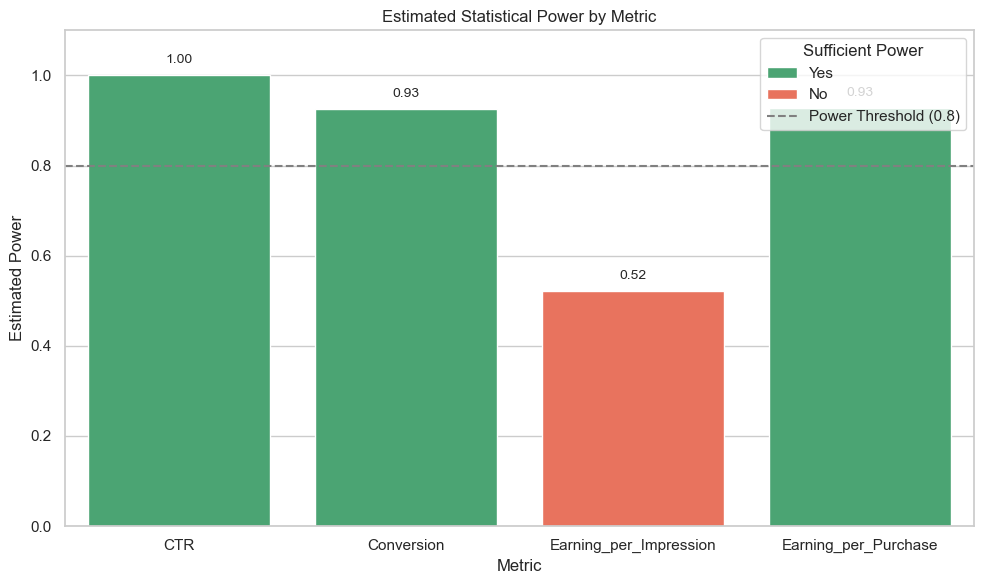

In [378]:
sns.set(style='whitegrid')

palette = {'Yes': 'mediumseagreen', 'No': 'tomato'}

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=power_df, x='Metric', y='Estimated Power',
                 hue='Sufficient Power (≥0.8)', palette=palette)

plt.axhline(0.8, color='gray', linestyle='--', label='Power Threshold (0.8)')

for i, row in power_df.iterrows():
    ax.text(i, row['Estimated Power'] + 0.02, f"{row['Estimated Power']:.2f}",
            ha='center', va='bottom', fontsize=10)

plt.title('Estimated Statistical Power by Metric')
plt.ylabel('Estimated Power')
plt.xlabel('Metric')
plt.ylim(0, 1.1)
plt.legend(title='Sufficient Power')
plt.tight_layout()
plt.show()

The power analysis showed that three out of four metrics have sufficient statistical sensitivity. For CTR, the power is 1.000, meaning the probability of detecting a real effect—if one exists—is 100%. This is an ideal result, confirming that the sample size is fully adequate for identifying differences in this metric. Conversion has a power of 0.925, which also indicates high reliability: the likelihood of missing a true difference is very low. Earning per Purchase shows a power of 0.928, confirming that the observed differences in purchase value are detected with high confidence. However, Earning per Impression has a power of only 0.521, which is well below the conventional threshold of 0.8. This means that even if a real difference exists between groups for this metric, the current sample may not be sensitive enough to detect it. In this case, there’s a risk of a Type II error—failing to identify an effect that actually exists. Overall, the results confirm that the test was sufficiently powered for most key metrics, but evaluating revenue per impression may require a larger sample or an additional experiment.

<h3></h3>

During the A/B test, significant differences in user behavior were observed between the control and test groups. Despite a lower CTR in the test group (3.42% vs. 5.36% in the control), it demonstrated a more efficient conversion funnel: fewer clicks, but more purchases and higher revenue. This is supported by the fact that the click-to-purchase conversion rate in the test group was 15.66%, compared to just 11.59% in the control group. This suggests that clicks in the test group were more targeted and led to meaningful actions.
Revenue per impression was also higher in the test group—0.0214 versus 0.0195—indicating that each ad view generated more value. Additionally, the average revenue per purchase in the test group was 4.65, compared to 3.69 in the control group, which may reflect higher-priced products or a more qualified audience.<br>

Behavioral analysis within each group revealed that in the test group, users with a high number of impressions clicked less (3934.89 vs. 3997.10), possibly due to banner fatigue. Users with more clicks made slightly fewer purchases (580.22 vs. 583.55), which may indicate indecision or irrelevant content. However, users with more purchases generated more revenue (2540.45 vs. 2489.40), confirming the expected link between purchase volume and earnings.<br>

In the control group, a similar trend was observed: users with more impressions clicked less (4734.25 vs. 5467.00). But unlike the test group, users with more clicks made more purchases (578.3 vs. 523.5), suggesting a more linear and predictable funnel. Revenue also increased with purchase volume (1929.90 vs. 1885.00).<br>

Correlation analysis showed that in the test group, impressions and clicks had a moderately negative relationship (–0.263), supporting the idea of banner fatigue. Impressions and purchases had a weak positive correlation (0.220), suggesting that repeated exposure may slightly increase purchase likelihood. However, impressions and earnings were nearly uncorrelated (0.017), indicating that more impressions do not directly lead to higher revenue. Clicks were weakly positively correlated with purchases (0.067), but negatively correlated with earnings (–0.349), implying that not all clicks were high-quality. Purchases and earnings had a weak positive relationship (0.069), possibly due to varying purchase values.<br>

In the control group, correlations were generally weaker but followed different directions. Impressions had almost no effect on clicks (–0.053), but showed slight positive correlations with purchases (0.135) and earnings (0.039), suggesting a more balanced user response. Clicks were not correlated with purchases (–0.019), but had a weak positive correlation with earnings (0.177), indicating that clicks in this group may have been more valuable. Purchases and earnings also showed a weak positive correlation (0.111), which aligns with expectations.<br>

The test group ultimately delivered stronger performance across key metrics despite having a lower CTR. This highlights that a higher CTR does not necessarily mean better results, especially if those clicks don’t lead to conversions or revenue.
Statistical testing using the Mann–Whitney U test confirmed that differences between the control and test groups were significant across all four metrics. For CTR, the U-statistic was 1308.0 with a p-value of 0.000001, indicating that the difference is highly unlikely to be due to chance. The conversion rate showed a U-statistic of 459.0 and a p-value of 0.001051, confirming that users in the test group were more likely to complete a purchase after clicking. Revenue per impression had a U-statistic of 593.0 and a p-value of 0.046917, suggesting a statistically significant—though less pronounced—advantage for the test group. Revenue per purchase showed a strong difference, with a U-statistic of 453.0 and a p-value of 0.000855, indicating that the average purchase value was higher in the test group. All p-values were below the 0.05 threshold, allowing us to confidently conclude that the test group’s improvements were not random.<br>

Power analysis showed that three out of four metrics had sufficient statistical sensitivity. For CTR, the power was 1.000, meaning the test was fully capable of detecting a real effect. Conversion had a power of 0.925, indicating high reliability. Revenue per purchase had a power of 0.928, confirming strong confidence in the observed difference. However, revenue per impression had a power of just 0.521, which is below the conventional threshold of 0.8. This means that even if a real difference exists for this metric, the current sample may not be sensitive enough to detect it, posing a risk of a Type II error.<br>

In summary, the test group demonstrated more efficient performance: fewer clicks, but more purchases and higher revenue. This may reflect better targeting, improved user experience, or a more optimized advertising strategy.